In [53]:
import plotly.io as pio
pio.renderers.default="vscode"


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

In [55]:
pd.set_option('display.max_columns',None)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] =(15,5)

In [56]:
df = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=20,skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


###clean data for visualization

In [57]:
cols=df.columns.tolist()
print(cols)

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


In [58]:
cols_to_drop=['Type','Coverage','AREA','REG','DEV', 'DevName']

In [59]:
df.rename(columns={

'OdName':'Country',
'AreaName':'Continent',
'RegName': 'Region'
}, inplace=True)
df.head()

,Type,Coverage,Country,AREA,Continent,REG,Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [60]:
df.set_index('Country',inplace=True)
df.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1


In [61]:
df.loc['Afghanistan',range(1980,2014)].sum()

58639

In [62]:
df.loc['China',range(1980,2014)].sum()

659962

In [63]:
df['total']= df.sum(axis=1)

C:\Users\KULDEE~1\AppData\Local\Temp/ipykernel_6336/2378947913.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [64]:
df.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,65977
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,18433
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,72156
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2774
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1,2749


In [65]:
df.sort_values(by='total',inplace=True)
df.head()

,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2719
Sao Tome and Principe,Immigrants,Foreigners,903,Africa,911,Middle Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,1,2,0,0,1,2726
Canada,Immigrants,Citizens,905,Northern America,905,Northern America,901,Developed regions,0,0,0,0,0,0,0,0,0,0,3,3,4,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2731
San Marino,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2739
New Caledonia,Immigrants,Foreigners,909,Oceania,928,Melanesia,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,2744


##### Visualization chart
- Line plot
- Area chart
- Pie chart 
- scatter plot
- histogram
- world map


- growth or decay - line plot,area plot
- comparsion between values - bar plot or pie chart
- frequency distribution - Histogram, KDE , BOXPLOT
- REALTION BETWEEN 2 OR 3 VALUES - SCATTER
-geographical view - Map (folium)


1. Growth or Decay

In [66]:
years = range(1980,2014)

In [67]:
print(df.index.tolist())

['Western Sahara', 'Sao Tome and Principe', 'Canada', 'San Marino', 'New Caledonia', 'Andorra', 'Vanuatu', 'Monaco', 'Palau', 'Marshall Islands', 'American Samoa', 'Liechtenstein', 'Tuvalu', 'Equatorial Guinea', 'Kiribati', 'Nauru', 'Guinea-Bissau', 'Papua New Guinea', 'Lesotho', 'Montenegro', 'Samoa', 'Mozambique', 'Swaziland', 'Comoros', 'Tonga', 'Qatar', 'Cabo Verde', 'Luxembourg', 'Oman', 'Malawi', 'China, Macao Special Administrative Region', 'Namibia', 'Botswana', "Democratic People's Republic of Korea", 'Bahrain', 'Slovenia', 'Central African Republic', 'Iceland', 'Gambia', 'Brunei Darussalam', 'Saint Kitts and Nevis', 'Suriname', 'Bahamas', 'United Arab Emirates', 'Estonia', 'Gabon', 'Niger', 'Mongolia', 'Antigua and Barbuda', 'Mauritania', 'Belize', "Lao People's Democratic Republic", 'Cyprus', 'Seychelles', 'Malta', 'Djibouti', 'Chad', 'Zambia', 'Congo', 'Serbia', 'Paraguay', 'Burkina Faso', 'Kuwait', 'Georgia', 'Angola', 'Mali', 'Madagascar', 'Latvia', 'Norway', 'Lithuania',

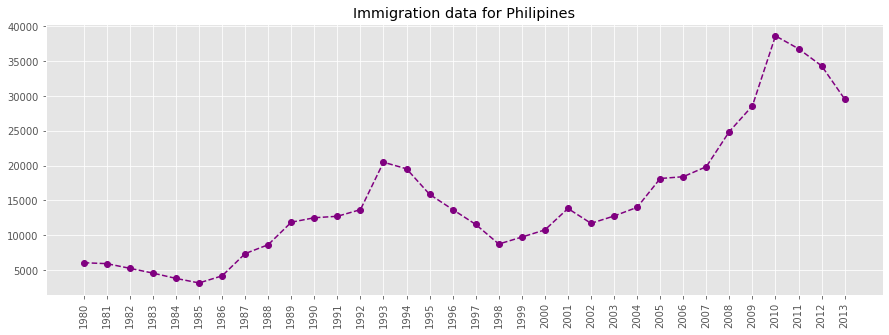

In [68]:
df.loc['Philippines',years].plot(style='--o',color ='purple', title ='Immigration data for Philipines')
plt.xticks(years,rotation=90)
plt.savefig('ip.png')

In [69]:
df.loc[['Philippines','Poland'],years].T  ##transposing the data

Country,Philippines,Poland
1980,6051,863
1981,5921,2930
1982,5249,5881
1983,4562,4546
1984,3801,3588
1985,3150,2819
1986,4166,4808
1987,7360,6931
1988,8639,9211
1989,11865,16025


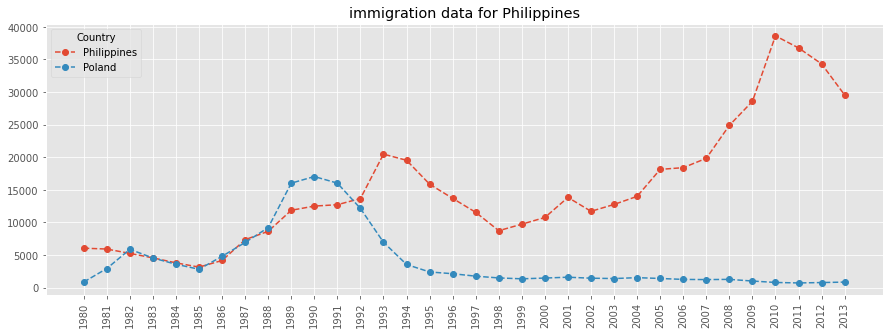

In [70]:
df.loc[['Philippines','Poland'],years].T.plot(style='--o',title='immigration data for Philippines')
plt.xticks(years,rotation=90)
plt.show()

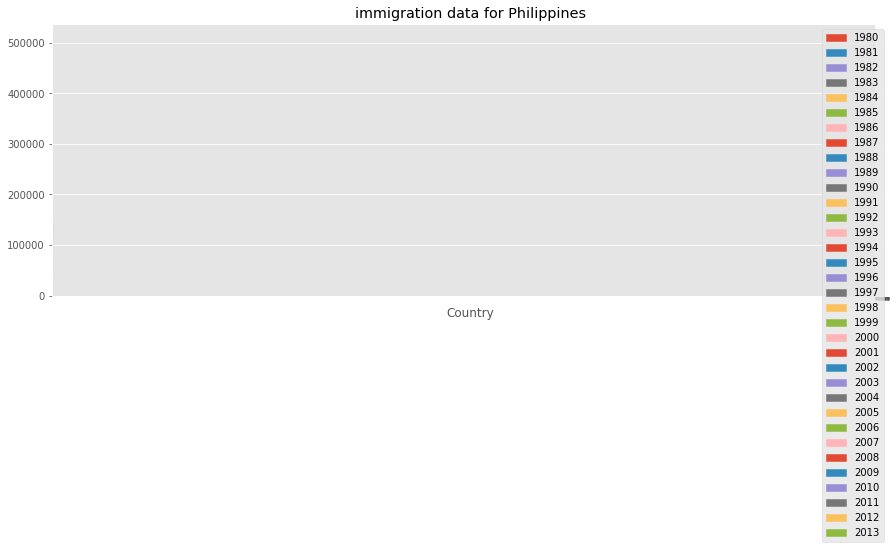

In [71]:
df.loc[['Philippines','Poland'],years].plot(kind='area',title='immigration data for Philippines')
plt.xticks(years,rotation=90)
plt.show()

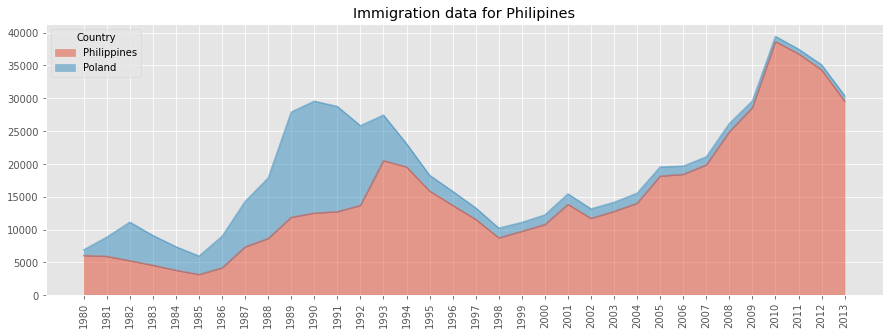

In [72]:
# stacked area plot
df.loc[['Philippines','Poland'],years].T.plot(kind='area',title='Immigration data for Philipines',alpha=.5)
plt.xticks(years,rotation=90)
plt.show()



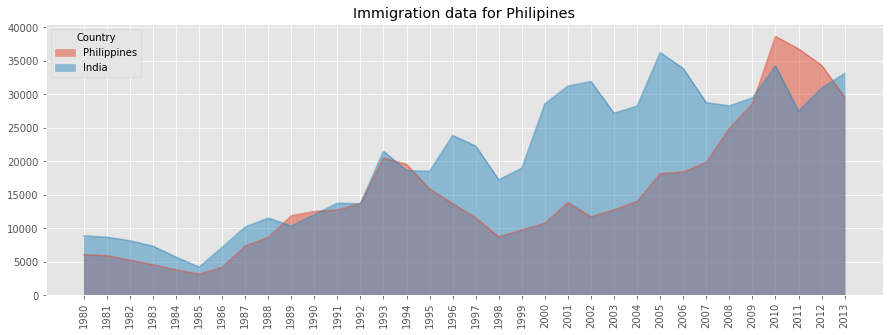

In [73]:
# unstacked area plot
df.loc[['Philippines','India'],years].T.plot(kind='area',title='Immigration data for Philipines',alpha=.5, stacked=False)
plt.xticks(years,rotation=90)
plt.show()

In [74]:
china_df = df.loc['China',years].reset_index()
fig = px.line(china_df,x='index',y='China')
fig.show()



In [75]:
px.area(china_df,x='index',y='China',orientation='v')

In [76]:
df.rename({'United Kingdom of Great Britain and Northern Ireland':"Britain"},inplace=True)

In [77]:
countries_top5 = df.index.tolist()[-5:]
countries_top5

['Pakistan', 'Philippines', 'Britain', 'China', 'India']

<AxesSubplot:xlabel='Country'>

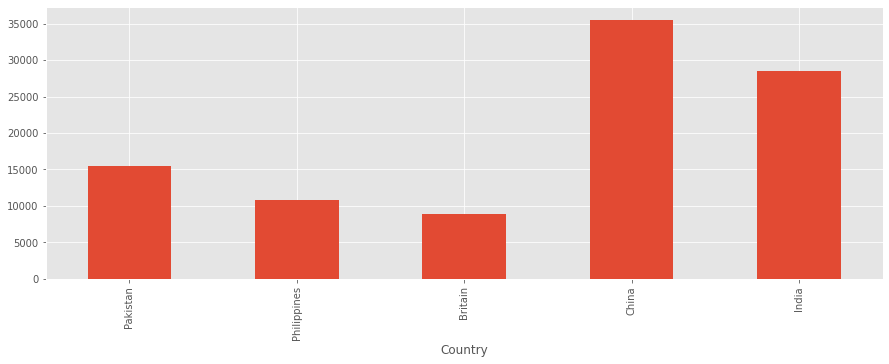

In [78]:
df.loc[countries_top5,2000].plot(kind='bar')

<AxesSubplot:ylabel='2000'>

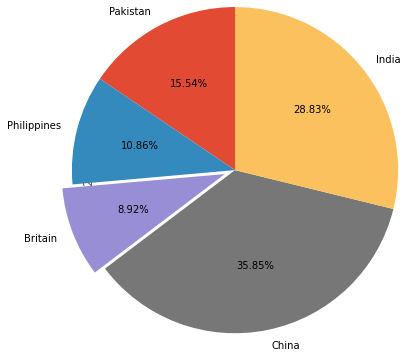

In [79]:
df.loc[countries_top5,2000].plot(kind='pie',autopct='%.2f%%',explode=[0,0,.1,0,0],radius=1.5,startangle=90)

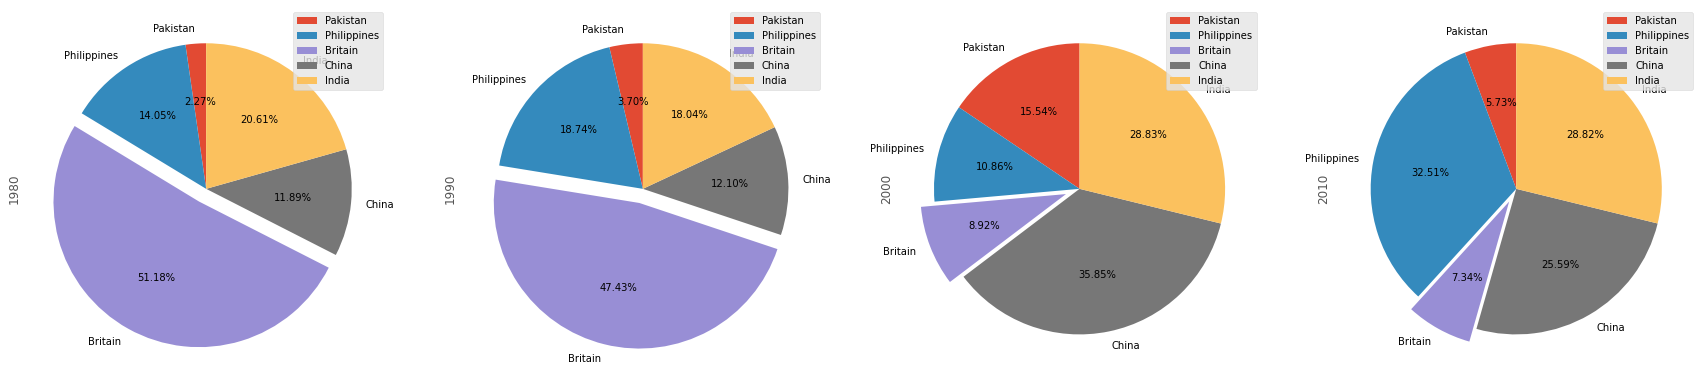

In [80]:
df.loc[countries_top5,[1980,1990,2000,2010]].plot(
                                                kind='pie',
                                                autopct='%.2f%%',
                                                explode=[0,0,.1,0,0],
                                                radius=1,startangle=90,
                                                subplots=True,figsize=(30,8))
plt.show()

<AxesSubplot:ylabel='2000'>

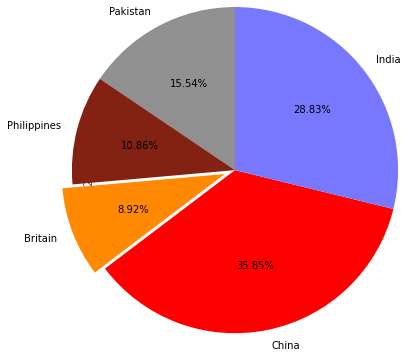

In [81]:
df.loc[countries_top5,2000].plot(kind='pie',autopct='%.2f%%',
                                explode=[0,0,.1,0,0],radius=1.5,startangle=90,
                                colors=['#909090','#832112','#ff8902','red','#7878ff'])

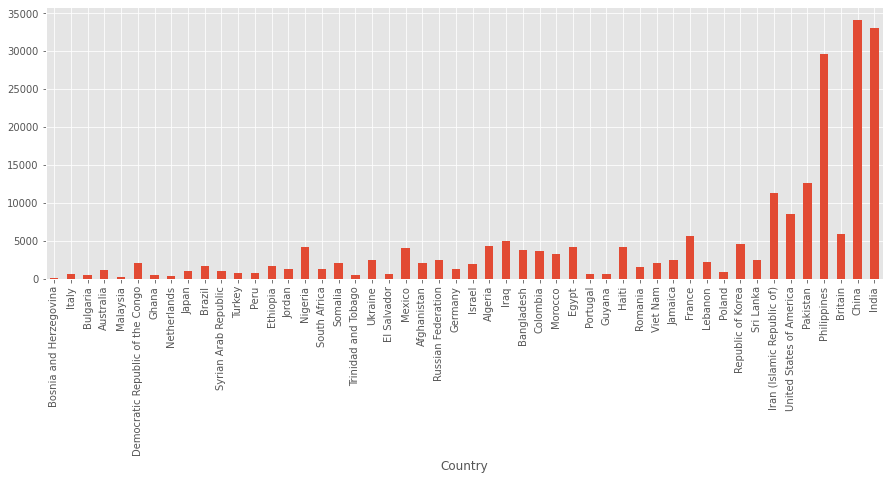

In [82]:
df.iloc[-50:][2013].plot(kind='bar')
plt.show()

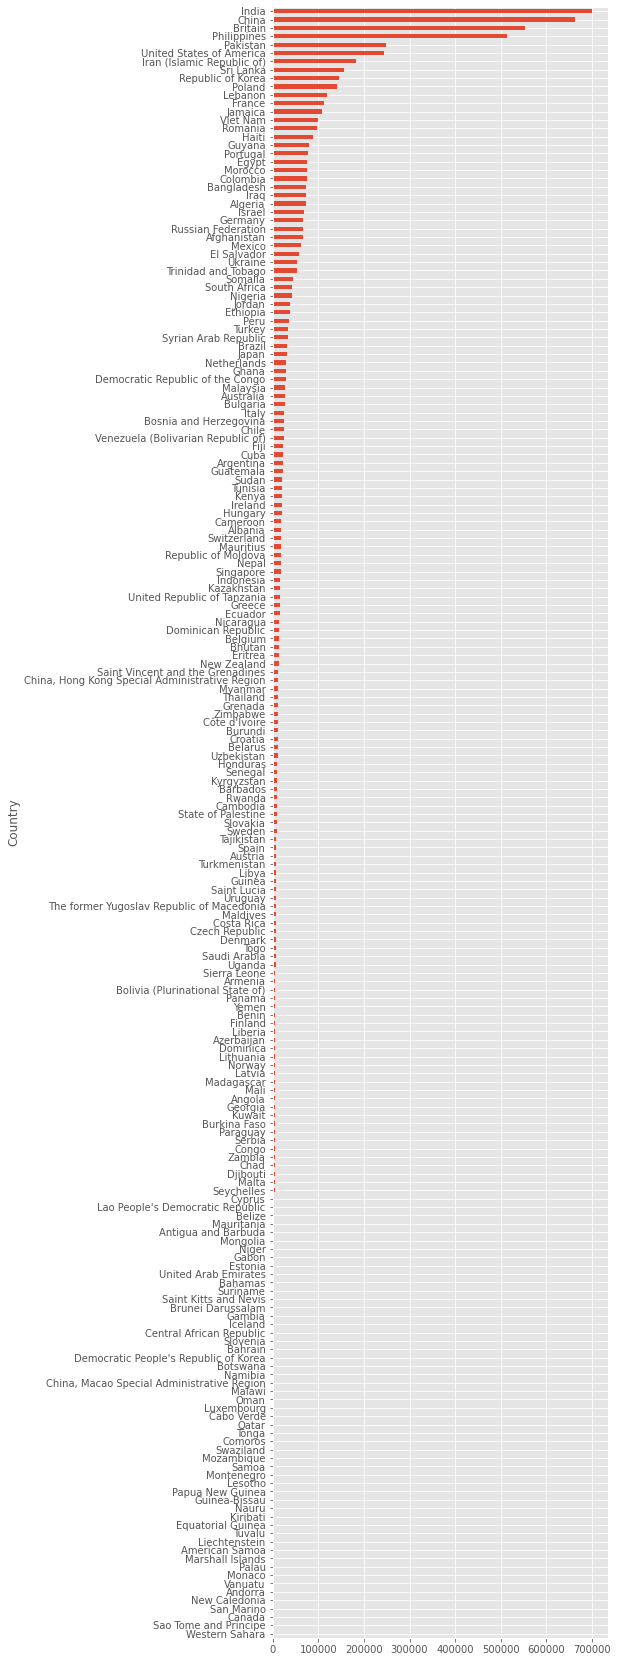

In [83]:
df['total'].plot(kind='barh',figsize=(6,30))
plt.show()

In [84]:
df


,Type,Coverage,AREA,Continent,REG,Region,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Western Sahara,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2719
Sao Tome and Principe,Immigrants,Foreigners,903,Africa,911,Middle Africa,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,1,1,1,0,0,1,2,0,0,1,2726
Canada,Immigrants,Citizens,905,Northern America,905,Northern America,901,Developed regions,0,0,0,0,0,0,0,0,0,0,3,3,4,3,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2731
San Marino,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2739
New Caledonia,Immigrants,Foreigners,909,Oceania,928,Melanesia,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,2744
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pakistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,248938
Philippines,Immigrants,Foreigners,935,Asia,920,South-Eastern Asia,902,Developing regions,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,12509,12718,13670,20479,19532,15864,13692,11549,8735,9734,10763,13836,11707,12758,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544,514148
Britain,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,31668,23380,34123,33720,39231,30145,29322,22965,10367,7045,8840,11728,8046,6797,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827,554233


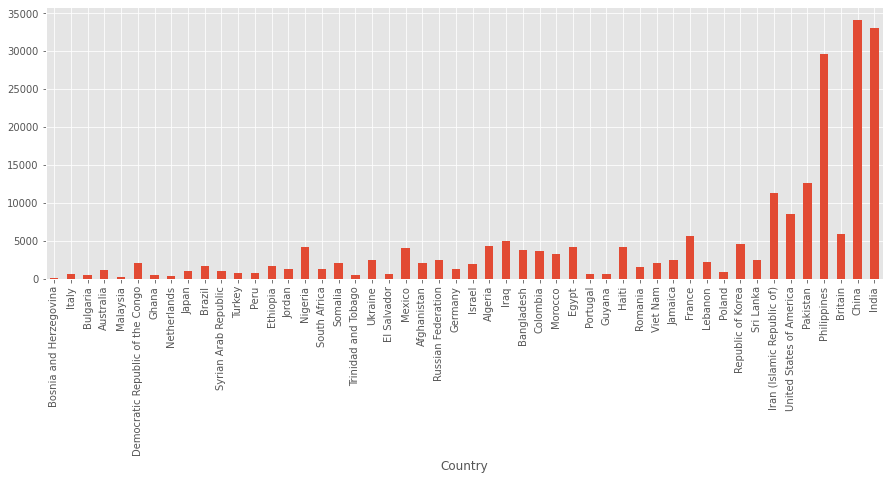

In [85]:
df.iloc[-50:][2013].plot(kind='bar')
plt.show()

In [86]:
df_2013 = df.iloc[-50:][2013].reset_index()
fig=px.bar(df_2013,x='Country',y = 2013,height = 500)
fig.write_html('raju.html')

In [87]:
px.bar_polar(df_2013,r='Country',theta=2013,title ='50 countries immigration data from 2010')